In [4]:
#importing necessary libraries
#downloading necessary NLTK resources

import sklearn
print(sklearn.__version__)


import pandas as pd 
import numpy as np 
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') 

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\praju\OneDrive\Desktop\customer_reviews_clustering


In [ ]:
#Loading the dataset and creating a dataframe
df = pd.read_csv("amazon_reviews.csv")
df

,Reviewer ID,Product Purchased,Customer Name,Review Text,Rating
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,No issues.,4
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"Purchased this for my device, it worked as adv...",5
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,it works as expected. I should have sprung for...,4
3,A3H99DFEG68SR,B007WTAJTO,1m2,This think has worked out great.Had a diff. br...,5
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"Bought it with Retail Packaging, arrived legit...",5
...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""",I bought this Sandisk 16GB Class 10 to use wit...,1
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,Used this for extending the capabilities of my...,5
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,Great card that is very fast and reliable. It ...,5
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,Good amount of space for the stuff I want to d...,5


In [ ]:
# Keep only relevant columns (review text + rating)
df = df[["Review Text", "Rating"]]

# Dropping missing values
df.dropna(inplace=True)

# Extracting reviews column as text
reviews = df["Review Text"].astype(str)

print("Cleaned dataset shape:", df.shape)
reviews.head()


Cleaned dataset shape: (4912, 2)


0                                           No issues.
1    Purchased this for my device, it worked as adv...
2    it works as expected. I should have sprung for...
3    This think has worked out great.Had a diff. br...
4    Bought it with Retail Packaging, arrived legit...
Name: Review Text, dtype: object

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation, numbers, special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords + Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning
cleaned_reviews = reviews.apply(clean_text)

print("Sample cleaned review:\n", cleaned_reviews.iloc[0])


Sample cleaned review:
 issue


In [ ]:
# Convert text into numerical form
vectorizer = TfidfVectorizer(max_features=1000)  # adjust max_features if needed
X = vectorizer.fit_transform(cleaned_reviews)

print("TF-IDF Matrix shape:", X.shape)



TF-IDF Matrix shape: (4912, 1000)


DATA ANALYSIS


In [5]:
# step1_load.py

import pandas as pd

# Load your dataset
df = pd.read_csv("amazon_reviews.csv")

# Show first few rows
print("First 5 rows:")
print(df.head())

# Show column names
print("\nColumn names:")
print(df.columns)

# Show dataset shape
print("\nShape of dataset:", df.shape)


First 5 rows:
      Reviewer ID Product Purchased Customer Name  \
0  A3SBTW3WS4IQSN        B007WTAJTO           NaN   
1  A18K1ODH1I2MVB        B007WTAJTO          0mie   
2  A2FII3I2MBMUIA        B007WTAJTO           1K3   
3   A3H99DFEG68SR        B007WTAJTO           1m2   
4  A375ZM4U047O79        B007WTAJTO  2&amp;1/2Men   

                                         Review Text  Rating  
0                                         No issues.       4  
1  Purchased this for my device, it worked as adv...       5  
2  it works as expected. I should have sprung for...       4  
3  This think has worked out great.Had a diff. br...       5  
4  Bought it with Retail Packaging, arrived legit...       5  

Column names:
Index(['Reviewer ID', 'Product Purchased', 'Customer Name', 'Review Text',
       'Rating'],
      dtype='object')

Shape of dataset: (4915, 5)


RATING DISTRIBUTION


In [6]:
import pandas as pd

df = pd.read_csv("amazon_reviews.csv")
print(df.columns)



Index(['Reviewer ID', 'Product Purchased', 'Customer Name', 'Review Text',
       'Rating'],
      dtype='object')


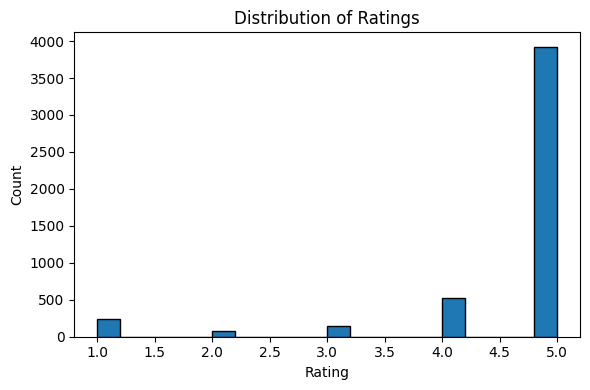

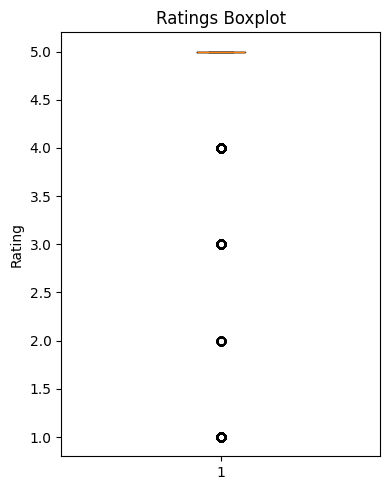

✅ Saved plots: ratings_histogram.png and ratings_boxplot.png


In [7]:
# ratings_distribution.py

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("amazon_reviews.csv")

# Use the 'Rating' column for ratings (numeric)
ratings = pd.to_numeric(df["Rating"], errors="coerce")

# --- Histogram of ratings ---
plt.figure(figsize=(6,4))
ratings.plot(kind="hist", bins=20, edgecolor="black")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("ratings_histogram.png")   # save plot
plt.show()

# --- Boxplot of ratings ---
plt.figure(figsize=(4,5))
plt.boxplot(ratings.dropna(), vert=True)
plt.title("Ratings Boxplot")
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig("ratings_boxplot.png")     # save plot
plt.show()

print("✅ Saved plots: ratings_histogram.png and ratings_boxplot.png")


PRODUCT_DISTRIBUTION 


✅ Top 10 Most Reviewed Products:
Product Purchased
B007WTAJTO    4915
Name: count, dtype: int64


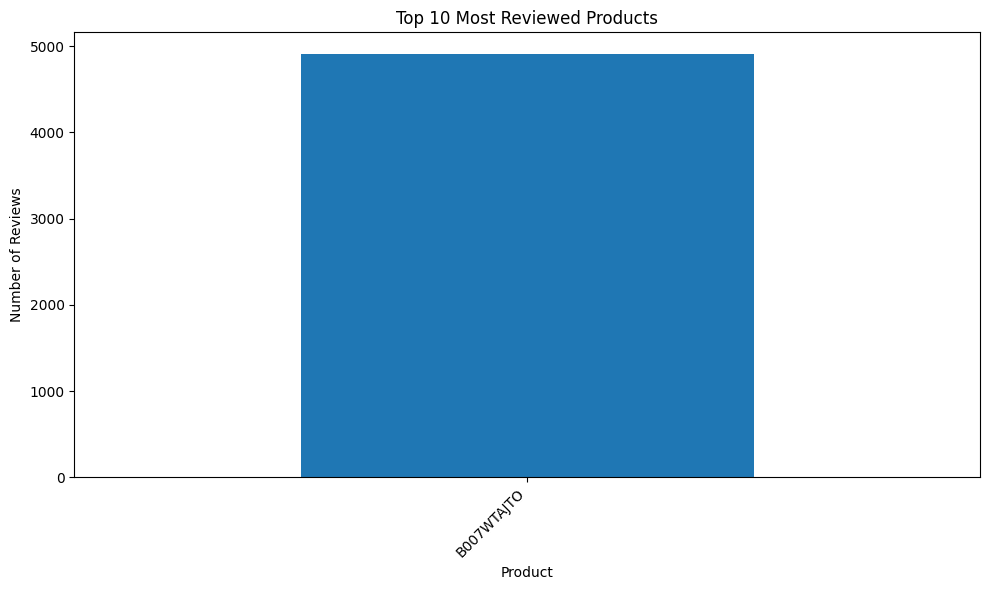

✅ Saved plot: top_products.png


In [8]:
# step3_product_distribution.py

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("amazon_reviews.csv")

# Count number of reviews per product
product_counts = df["Product Purchased"].value_counts().head(10)  # Top 10 products

# --- Print top products ---
print("✅ Top 10 Most Reviewed Products:")
print(product_counts)

# --- Bar chart of top products ---
plt.figure(figsize=(10,6))
product_counts.plot(kind="bar")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Product")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("top_products.png")
plt.show()

print("✅ Saved plot: top_products.png")


WORD FREQUENCY COUNT


In [9]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
#word_frequency.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

In [11]:
# Load dataset
df = pd.read_csv("amazon_reviews.csv")

In [12]:
# Use 'Review Text' column, drop NaN
reviews = df["Review Text"].dropna().astype(str)

In [13]:
# Combine all reviews into one string
all_text = " ".join(reviews).lower()

In [14]:
# Remove punctuation and non-alphabetic characters
all_text = re.sub(r"[^a-z\s]", "", all_text)

In [15]:
# Tokenize words
words = all_text.split()


In [16]:
# Remove stopwords (like 'the', 'is', 'and')
stop_words = set(stopwords.words("english"))
filtered_words = [w for w in words if w not in stop_words and len(w) > 2]

In [17]:
# Count word frequencies
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)  # top 20 words

In [18]:
# Convert to DataFrame for plotting
wc_df = pd.DataFrame(common_words, columns=["word", "count"])

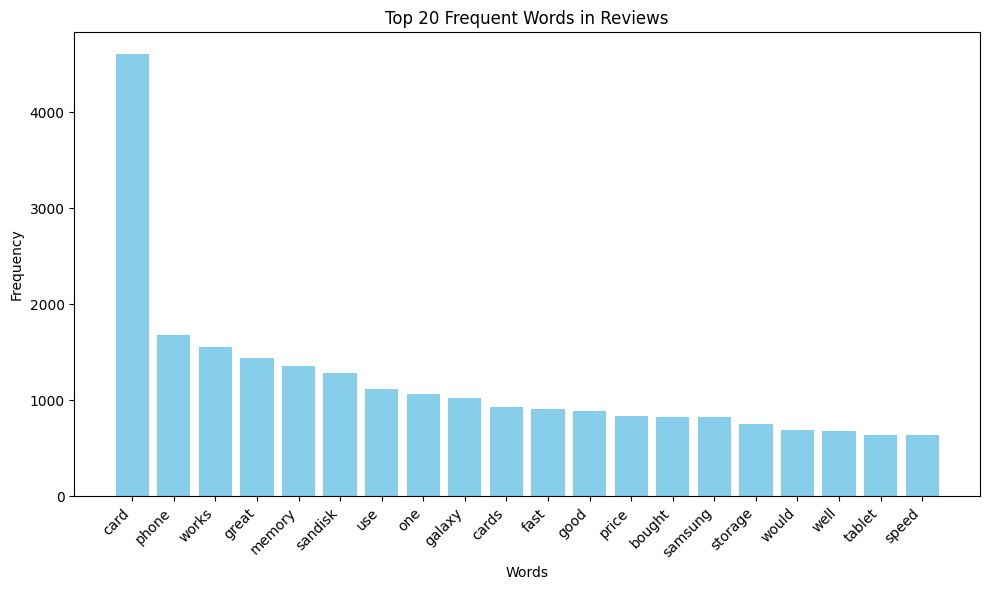

✅ Saved word frequency plot as word_frequency.png


In [19]:
# --- Plot word frequency ---
plt.figure(figsize=(10,6))
plt.bar(wc_df["word"], wc_df["count"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Frequent Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("word_frequency.png")
plt.show()

print("✅ Saved word frequency plot as word_frequency.png")

INSIGHTS FROM EDA


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Load dataset
df = pd.read_csv("amazon_reviews.csv")

In [22]:
# --- 1. Popular products (top 5) ---
popular_products = df["Product Purchased"].value_counts().head(5)

In [23]:
# --- 2. Average ratings per product ---
avg_ratings = df.groupby("Product Purchased")["Rating"].mean().sort_values(ascending=False).head(5)

In [24]:
# --- 3. Overall average rating ---
overall_avg = df["Rating"].mean()

In [25]:
# --- 4. Distribution summary ---
rating_counts = df["Rating"].value_counts().sort_index()

In [26]:
# Print insights
print("\n📊 Insights from EDA:")
print("-" * 40)
print("Most Purchased Products:\n", popular_products, "\n")
print("Products with Highest Average Ratings:\n", avg_ratings, "\n")
print(f"Overall Average Rating: {overall_avg:.2f}")
print("\nRatings Distribution:\n", rating_counts)
print("-" * 40)
print("✅ Insights generated. Save this output for reporting.")


📊 Insights from EDA:
----------------------------------------
Most Purchased Products:
 Product Purchased
B007WTAJTO    4915
Name: count, dtype: int64 

Products with Highest Average Ratings:
 Product Purchased
B007WTAJTO    4.587589
Name: Rating, dtype: float64 

Overall Average Rating: 4.59

Ratings Distribution:
 Rating
1     244
2      80
3     142
4     527
5    3922
Name: count, dtype: int64
----------------------------------------
✅ Insights generated. Save this output for reporting.


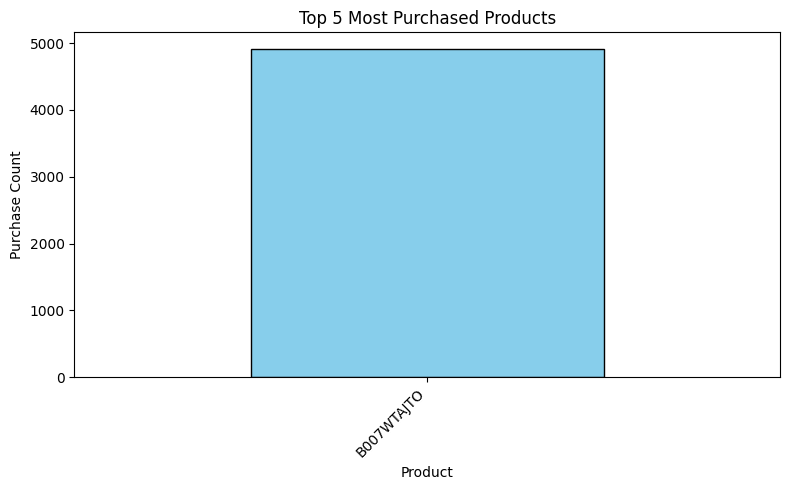

In [27]:
# --- PLOTS ---
# Plot 1: Top 5 Popular Products
plt.figure(figsize=(8,5))
popular_products.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 5 Most Purchased Products")
plt.xlabel("Product")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("popular_products.png")
plt.show()

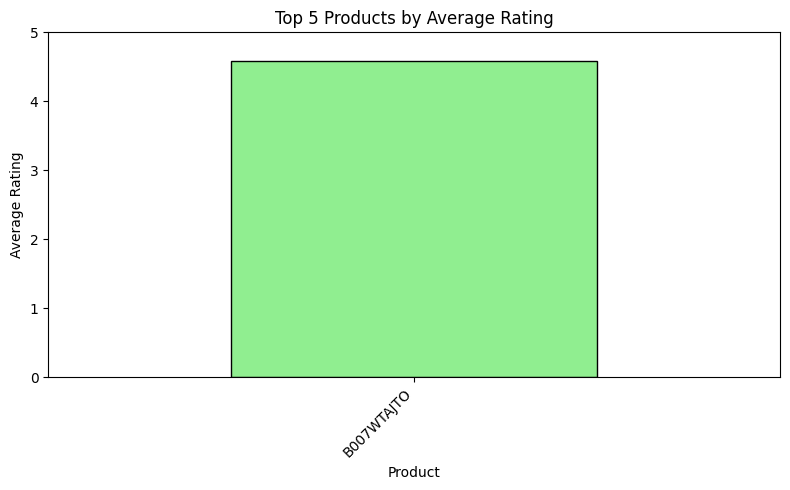

In [28]:
# Plot 2: Top 5 Products by Average Rating
plt.figure(figsize=(8,5))
avg_ratings.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Top 5 Products by Average Rating")
plt.xlabel("Product")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 5)   # ratings are 1–5
plt.tight_layout()
plt.savefig("top_rated_products.png")
plt.show()

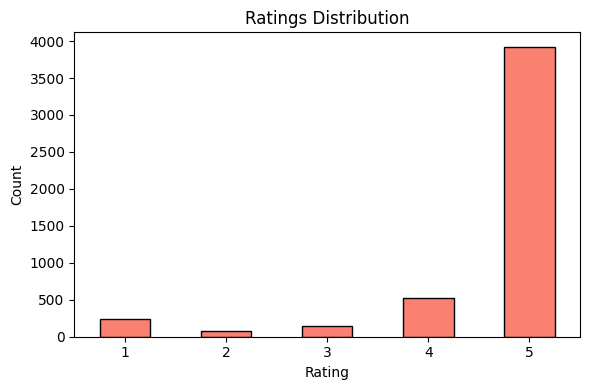

✅ Saved plots: popular_products.png, top_rated_products.png, rating_distribution.png


In [29]:
# Plot 3: Rating Distribution
plt.figure(figsize=(6,4))
rating_counts.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("rating_distribution.png")
plt.show()

print("✅ Saved plots: popular_products.png, top_rated_products.png, rating_distribution.png")